In [2]:

# Import libraries here
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from glob import glob
from IPython.display import VimeoVideo
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings


warnings.simplefilter(action="ignore", category=FutureWarning)

/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-5.csv
/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-4.csv
/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-1.csv
/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-2.csv
/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-3.csv


In this project, I will be creating a model that predicts apartment prices based on various variables

Import Data

Task 2.5.1: Write a wrangle function that takes the name of a CSV file as input and returns a DataFrame. The function should do the following steps:

Subset the data in the CSV file and return only apartments in Mexico City ("Distrito Federal") that cost less than $100,000.
Remove outliers by trimming the bottom and top 10% of properties in terms of "surface_covered_in_m2".
Create separate "lat" and "lon" columns.
Mexico City is divided into 15 boroughs. Create a "borough" feature from the "place_with_parent_names" column.
Drop columns that are more than 50% null values.
Drop columns containing low- or high-cardinality categorical values.
Drop any columns that would constitute leakage for the target "price_aprox_usd".
Drop any columns that would create issues of multicollinearity.

In [26]:
def wrangle(filepath):
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Subset to property type called 'apartment'
    mask_apt = df["property_type"] == "apartment"
    
    # Subset to properties in `Distrito Federal`
    mask_prop_dist_fed = df["place_with_parent_names"].str.contains("Distrito Federal")
    
    #Subset to price of apartment that is less than $100_000
    mask_price_hundred = df["price_aprox_usd"] < 100_000
    
    # Combine the three conditions
    
    df = df[mask_prop_dist_fed & mask_apt & mask_price_hundred]
    
    # Remove Outliers from our data
    df["surface_covered_in_m2"].quantile([0.1, 0.9])
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between (low, high)
    df = df[mask_area]
    
    # Creating separate `lat` and `lon` columns
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    
    # Drop the `lat-lon` column
    df.drop(columns= "lat-lon", inplace=True)
    
    # Get place name `borough` feature from "place_with_parent_names" column.
    df["borough"] = df["place_with_parent_names"].str.split("|", expand=True)[1]
    df.drop(columns="place_with_parent_names", inplace=True)
    
    # Drop columns that are more than 50% null values.
    df.drop(columns=["surface_total_in_m2", "price_usd_per_m2", "floor", "rooms", "expenses"], inplace=True)
    
    # Drop columns containing low- or high-cardinality categorical values.
    df.drop(columns =["operation", "property_type", "currency", "properati_url"], inplace=True)
    
    # Drop any columns that would constitute leakage for the target "price_aprox_usd"
    df.drop(columns=["price",
                 "price_aprox_local_currency",
                 "price_per_m2",
                    ], inplace=True)
    # Drop any columns that would create issues of multicollinearity.
    corr = df.select_dtypes("number").drop(columns=["price_aprox_usd"]).corr()
    
    return df
    

1. I will first deal with one `csv` file
Now, here is the first condition
Subset the data in the CSV file and return only apartments in Mexico City ("Distrito Federal") that cost less than $100,000.

7. Drop any columns that would constitute leakage for the target "price_aprox_usd".

In [ ]:
sorted

In [9]:
# I will first subset my data to only show apartments in property_type column

mask_apt = df["property_type"] == "apartment"
mask_apt
# I will then add this to my wrangle function.

0        True
1       False
2        True
3        True
4        True
        ...  
4623     True
4624     True
4625    False
4626     True
4627     True
Name: property_type, Length: 4628, dtype: bool

In [8]:
# Next, I will subset my data to return apartments in `Distrito Federal`

mask_prop_dist_fed = df["place_with_parent_names"].str.contains("Distrito Federal")
mask_prop_dist_fed
# I will then add this to my wrangle function

0        True
1        True
2        True
3        True
4       False
        ...  
4623    False
4624     True
4625    False
4626     True
4627     True
Name: place_with_parent_names, Length: 4628, dtype: bool

In [7]:
# I will then subset my data to only return apartments with price < 100_000

mask_price_hundred = df["price_aprox_usd"] < 100_000
mask_price_hundred

0    False
1     True
2     True
3    False
4    False
Name: price_aprox_usd, dtype: bool

2. Remove outliers by trimming the bottom and top 10% of properties in terms of "surface_covered_in_m2".

In [10]:
# Remove Outliers from our data
df["surface_covered_in_m2"].quantile([0.1, 0.9])
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df["surface_covered_in_m2"].between (low, high)
mask_area


0        True
1        True
2        True
3        True
4        True
        ...  
4623     True
4624    False
4625     True
4626     True
4627     True
Name: surface_covered_in_m2, Length: 4628, dtype: bool

3. Create separate "lat" and "lon" columns.

In [ ]:
#  df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)

4. Mexico City is divided into 15 boroughs. Create a "borough" feature from the "place_with_parent_names" column.

In [ ]:
#  df["borough"] = df["place_with_parent_names"].str.split("|", expand=True)[1]
#  df.drop(columns="place_with_parent_names", inplace=True)

5. Drop columns that are more than 50% null values.

In [15]:
df.isnull().sum() / len(df)

operation                     0.000000
property_type                 0.000000
price                         0.000000
currency                      0.000000
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.908265
surface_covered_in_m2         0.000000
price_usd_per_m2              0.936421
price_per_m2                  0.000000
floor                         1.000000
rooms                         0.994550
expenses                      1.000000
properati_url                 0.000000
lat                           0.054496
lon                           0.054496
borough                       0.000000
dtype: float64

In [ ]:
# From this, columns that have over 50% NaN values are
#surface_total_in_m2, price_usd_per_m2, expenses and rooms
# I will drop these columns in my wrangle function

6. Drop columns containing low- or high-cardinality categorical values.

In [18]:
df.select_dtypes("object").nunique()

operation           1
property_type       1
currency            1
properati_url    1101
borough            14
dtype: int64

From this, I will have to drop columns `operation`, `property_type`, `currency` and `properati_url`

Drop any columns that would constitute leakage for the target "price_aprox_usd".

In [22]:
sorted(df.columns)

['borough',
 'lat',
 'lon',
 'price',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'price_per_m2',
 'surface_covered_in_m2']

8. Drop any columns that would create issues of multicollinearity.

In [27]:
# Drop any columns that would create issues of multicollinearity.
corr = df.select_dtypes("number").drop(columns=["price_aprox_usd"]).corr()
corr.head()

,surface_covered_in_m2,lat,lon
surface_covered_in_m2,1.000000,-0.017515,-0.021634
lat,-0.017515,1.000000,-0.988296
lon,-0.021634,-0.988296,1.000000


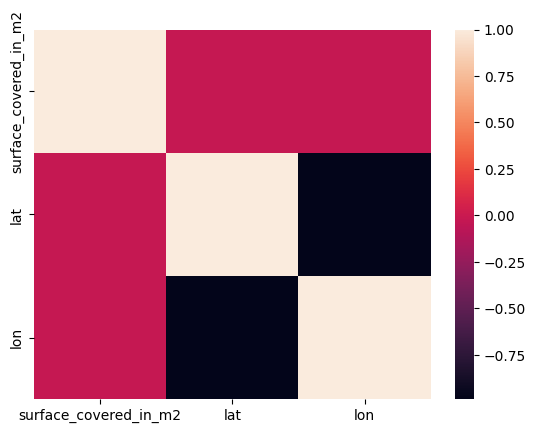

In [28]:
# Then let's plot the heatmap
sns.heatmap(corr);

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1101 entries, 11 to 4605
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        1101 non-null   float64
 1   surface_covered_in_m2  1101 non-null   float64
 2   lat                    1041 non-null   float64
 3   lon                    1041 non-null   float64
 4   borough                1101 non-null   object 
dtypes: float64(4), object(1)
memory usage: 51.6+ KB


In [30]:
# Use this cell to test your wrangle function and explore the data
df = wrangle("/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1101, 5)


,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
11,94022.66,57.0,23.634501,-102.552788,Benito Juárez
20,70880.12,56.0,19.402413,-99.095391,Iztacalco
21,68228.99,80.0,19.357820,-99.149406,Benito Juárez
22,24235.78,60.0,19.504985,-99.208557,Azcapotzalco
26,94140.20,50.0,19.354219,-99.126244,Coyoacán


After all these, I would have to then combine all my 5 CSV files
Use glob to create the list files. It should contain the filenames of all the Mexico City real estate CSVs in the ./data directory, except for mexico-city-test-features.csv.

In [31]:
files = glob("/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-*.csv")
files

['/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-5.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-4.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-1.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-2.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-3.csv']

In [32]:
# Creating a list comprehension
frames = [wrangle(file) for file in files]

Combine your wrangle function, a list comprehension, and pd.concat to create a DataFrame df. It should contain all the properties from the five CSVs in files.

In [33]:
df = pd.concat(frames, ignore_index=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        5473 non-null   float64
 1   surface_covered_in_m2  5473 non-null   float64
 2   lat                    5149 non-null   float64
 3   lon                    5149 non-null   float64
 4   borough                5473 non-null   object 
dtypes: float64(4), object(1)
memory usage: 213.9+ KB
None


,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,82737.39,75.0,19.362690,-99.150565,Benito Juárez
1,72197.60,62.0,19.291345,-99.124312,Tlalpan
2,44277.72,85.0,19.354987,-99.061709,Iztapalapa
3,60589.45,52.0,19.469681,-99.086136,Gustavo A. Madero
4,47429.08,53.0,19.443592,-99.121407,Venustiano Carranza


Explore

Create a histogram showing the distribution of apartment prices ("price_aprox_usd") in df. Be sure to label the x-axis "Price [$]", the y-axis "Count", and give it the title "Distribution of Apartment Prices". Use Matplotlib (plt).

What does the distribution of price look like? Is the data normal, a little skewed, or very skewed?

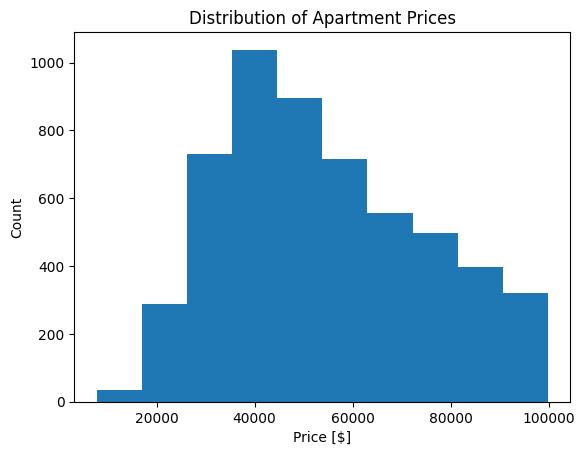

In [35]:
# Build histogram
plt.hist(df["price_aprox_usd"])


# Label axes
plt.xlabel("Price [$]")
plt.ylabel("Count")

# Add title
plt.title("Distribution of Apartment Prices");

Create a scatter plot that shows apartment price ("price_aprox_usd") as a function of apartment size ("surface_covered_in_m2"). Be sure to label your x-axis "Area [sq meters]" and y-axis "Price [USD]". Your plot should have the title "Mexico City: Price vs. Area". Use Matplotlib (plt).

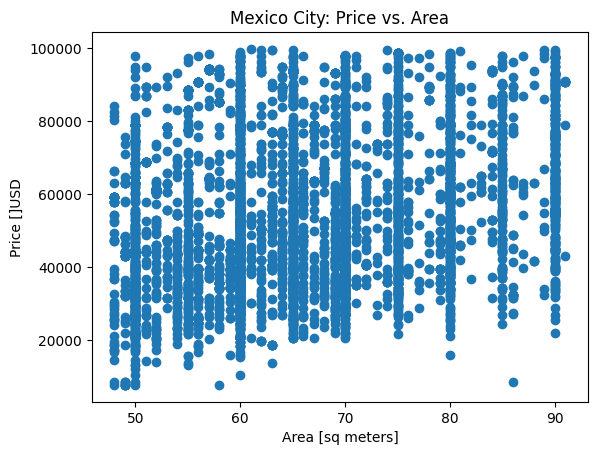

In [36]:
# Build scatter plot
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])


# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price []USD")

# Add title
plt.title("Mexico City: Price vs. Area");

Create a Mapbox scatter plot that shows the location of the apartments in your dataset and represent their price using color.

What areas of the city seem to have higher real estate prices?

In [37]:
# Plot Mapbox location and price
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    width=600,  # Width of map
    height=600,  # Height of map
    color="price_aprox_usd",
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")


fig.show()

The next step is Split

 Create your feature matrix X_train and target vector y_train. Your target is "price_aprox_usd". Your features should be all the columns that remain in the DataFrame you cleaned above.

In [38]:
# Split data into feature matrix `X_train` and target vector `y_train`.
target = "price_aprox_usd"
feature = ["surface_covered_in_m2", "lat", "lon", "borough"]
X_train = df[feature]
y_train = df[target]

Build Model

1. Baseline

Calculate the baseline mean absolute error for your model.

In [39]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 54246.5314982642
Baseline MAE: 17239.939475888295


In [40]:
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,82737.39,75.0,19.362690,-99.150565,Benito Juárez
1,72197.60,62.0,19.291345,-99.124312,Tlalpan
2,44277.72,85.0,19.354987,-99.061709,Iztapalapa
3,60589.45,52.0,19.469681,-99.086136,Gustavo A. Madero
4,47429.08,53.0,19.443592,-99.121407,Venustiano Carranza


2. Iterate

In [41]:
# Instantiate
ohe = OneHotEncoder(use_cat_names=True)

# Fit
ohe.fit(X_train)

# Transform
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train

(5473, 18)


,surface_covered_in_m2,lat,lon,borough_Benito Juárez,borough_Tlalpan,borough_Iztapalapa,borough_Gustavo A. Madero,borough_Venustiano Carranza,borough_Iztacalco,borough_Coyoacán,borough_Cuauhtémoc,borough_Miguel Hidalgo,borough_Azcapotzalco,borough_Tláhuac,borough_Álvaro Obregón,borough_La Magdalena Contreras,borough_Xochimilco,borough_Cuajimalpa de Morelos
0,75.0,19.362690,-99.150565,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,62.0,19.291345,-99.124312,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,85.0,19.354987,-99.061709,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,52.0,19.469681,-99.086136,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,53.0,19.443592,-99.121407,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,80.0,19.382944,-99.180028,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5469,65.0,19.448311,-99.157021,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5470,76.0,19.440147,-99.172286,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5471,60.0,19.351371,-99.161529,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


**Create a pipeline named model that contains all the transformers necessary for this dataset and one of the predictors you've used during this project. Then fit your model to the training data.

In [42]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)
# Then let's fit our model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['borough'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

3. Evaluate

Read the CSV file mexico-city-test-features.csv into the DataFrame X_test

In [44]:
X_test = pd.read_csv("/kaggle/input/mexico-city-test-features-data/mexico-city-test-features.csv")
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_covered_in_m2  1041 non-null   int64  
 1   lat                    986 non-null    float64
 2   lon                    986 non-null    float64
 3   borough                1041 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 32.7+ KB
None


,surface_covered_in_m2,lat,lon,borough
0,60,19.493185,-99.205755,Azcapotzalco
1,55,19.307247,-99.166700,Coyoacán
2,50,19.363469,-99.010141,Iztapalapa
3,60,19.474655,-99.189277,Azcapotzalco
4,74,19.394628,-99.143842,Benito Juárez


Use your model to generate a Series of predictions for X_test. When you submit your predictions to the grader, it will calculate the mean absolute error for your model.

In [45]:
y_test_pred = pd.Series(model.predict(X_test))
y_test_pred.head()

0    53538.366480
1    53171.988369
2    34263.884179
3    53488.425607
4    68738.924884
dtype: float64

In [46]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 18
['surface_covered_in_m2' 'lat' 'lon' 'borough_Benito Juárez'
 'borough_Tlalpan']


`Communicate Results`

This is the final step 

Create a Series named feat_imp. The index should contain the names of all the features your model considers when making predictions; the values should be the coefficient values associated with each feature. The Series should be sorted ascending by absolute value.

In [47]:
coefficients = model.named_steps["ridge"].coef_
feature_names = model.named_steps["onehotencoder"].get_feature_names()
feat_imp = pd.Series(coefficients, index=feature_names).sort_values(key=abs)
feat_imp

surface_covered_in_m2               291.654156
borough_Cuauhtémoc                 -350.531990
borough_Iztacalco                   405.403127
lat                                 478.901375
borough_Xochimilco                  929.857400
borough_Miguel Hidalgo             1977.314718
borough_Azcapotzalco               2459.288646
lon                               -2492.221814
borough_Álvaro Obregón             3275.121061
borough_Coyoacán                   3737.561001
borough_Venustiano Carranza       -5609.918629
borough_La Magdalena Contreras    -5925.666450
borough_Gustavo A. Madero         -6637.429757
borough_Cuajimalpa de Morelos      9157.269123
borough_Tlalpan                   10319.429804
borough_Iztapalapa               -13349.017448
borough_Benito Juárez             13778.188880
borough_Tláhuac                  -14166.869486
dtype: float64

Create a horizontal bar chart that shows the 10 most influential coefficients for your model. Be sure to label your x- and y-axis "Importance [USD]" and "Feature", respectively, and give your chart the title "Feature Importances for Apartment Price". Use pandas.

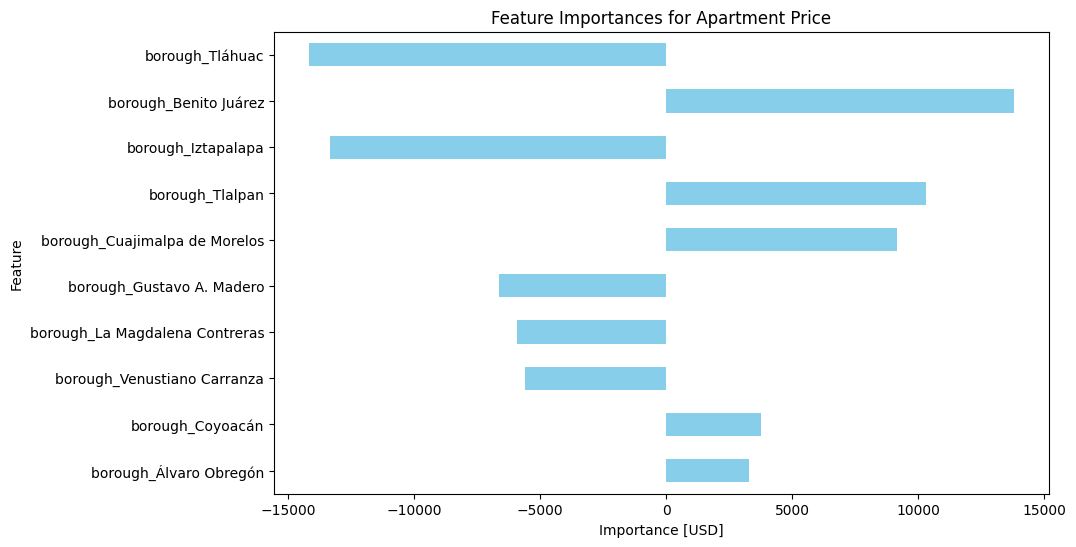

In [48]:
# Build bar chart
feat_imp_top10 = feat_imp.tail(10)  # Select the top 10 most influential coefficients
feat_imp_top10.plot(kind='barh', figsize=(10, 6), color='skyblue')

# Label axes
plt.xlabel('Importance [USD]')
plt.ylabel('Feature')

# Add title
plt.title('Feature Importances for Apartment Price')

# Show the plot
plt.show()

This project constitutes my machine learning model that predicts apartment prices in Mexico City. 